# General Setup

## Install Libraries

In [54]:
#! pip install numpy matplotlib scikit-learn pandas

## Import Libraries

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris, load_breast_cancer, make_classification, load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.signal import sawtooth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To avoid repetitive code, we'll define a helper function to plot the decision boundaries for our models.

In [9]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

# Part 1: Basic SVM

## Create Fake Data

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

## Train.Test.spilit

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Creation

In [15]:
model_linear = SVC(kernel='linear')

model_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Model Prediction

In [16]:
y_pred = model_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Plot Decision Boundary

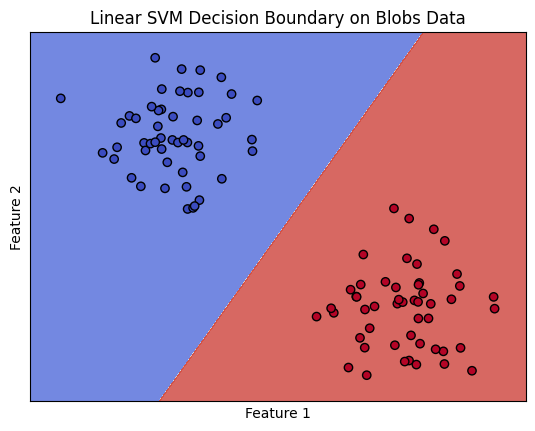

In [17]:
plot_decision_boundary(model_linear, X, y, "Linear SVM Decision Boundary on Blobs Data")

### Challenge: When Linear Fails

In [18]:
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

In [19]:
model_linear_circles = SVC(kernel='linear')
model_linear_circles.fit(X_train_c, y_train_c)

y_pred_c = model_linear_circles.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.33


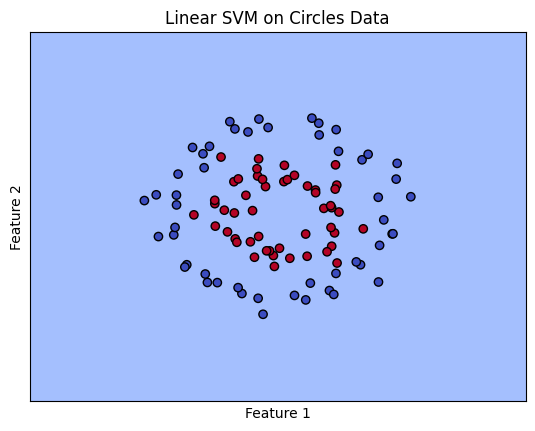

In [20]:
plot_decision_boundary(model_linear_circles, X_circles, y_circles, "Linear SVM on Circles Data")

Question 1: Why does the linear separator fail now?

وقتی که نویز اضافه کردیم و داده ها دایره ایی پخش شدن با خط نمتونیم جدا کنیم.

A linear separator fails because the make_circles dataset is not linearly separable. The data is arranged in two concentric circles, meaning you cannot draw a single straight line to separate the two classes correctly. The linear SVM attempts to find the best hyperplane (a line in 2D), but no such line can effectively divide the inner circle from the outer circle, resulting in very low accuracy.

### Challenge 2

In [22]:
X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42) 

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

In [23]:
model_linear_moon = SVC(kernel='linear')
model_linear_moon.fit(X_train_c, y_train_c)

y_pred_c = model_linear_moon.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.87


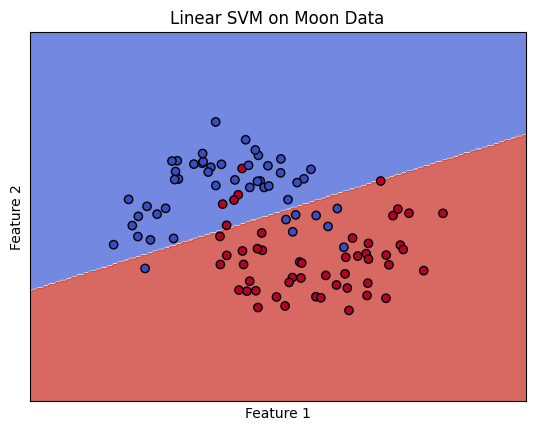

In [24]:
plot_decision_boundary(model_linear_moon, X_moon, y_moon, "Linear SVM on Moon Data")

Question 2: What separator would be more suitable for this data? Why?
A non-linear separator is required. Specifically, an SVM with a Radial Basis Function (RBF) kernel would be ideal. The RBF kernel can transform the 2D data into a higher-dimensional space where it becomes linearly separable. For the circles data, it can map the points so that a simple plane can separate them, effectively creating a circular or curved boundary in the original 2D space.

# Part 2: Play with Kernels

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

# Keep only class 1 and 2
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Compare Kernels

### Create models with different kernels

In [26]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly', degree=3)

### Train models

In [27]:
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, linear_svm.predict(X_test))
acc_rbf = accuracy_score(y_test, rbf_svm.predict(X_test))
acc_poly = accuracy_score(y_test, poly_svm.predict(X_test))

print(f"Accuracy (Linear Kernel): {acc_linear:.2f}")
print(f"Accuracy (RBF Kernel): {acc_rbf:.2f}")
print(f"Accuracy (Poly Kernel): {acc_poly:.2f}")

Accuracy (Linear Kernel): 0.70
Accuracy (RBF Kernel): 0.63
Accuracy (Poly Kernel): 0.70


### Plot decision boundaries

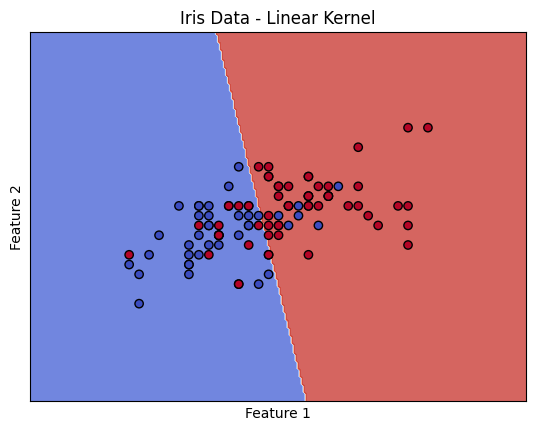

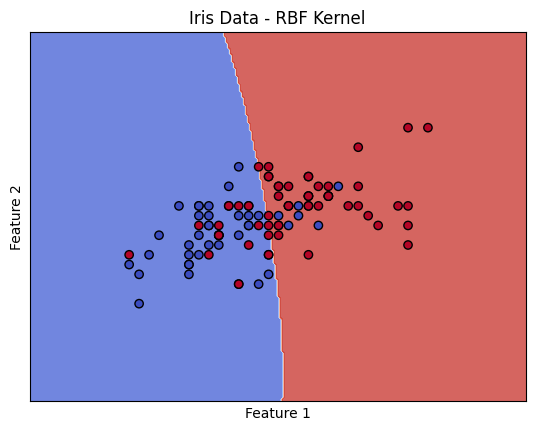

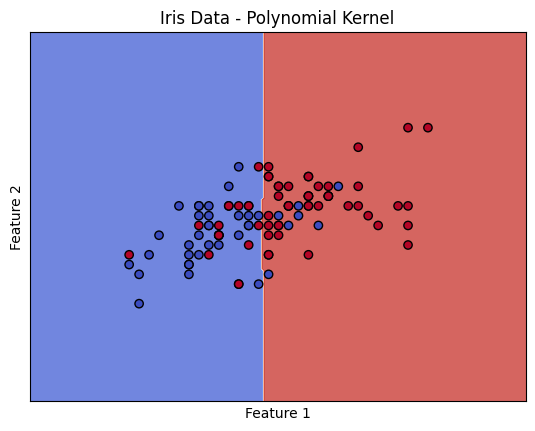

In [28]:
plot_decision_boundary(linear_svm, X, y, "Iris Data - Linear Kernel")
plot_decision_boundary(rbf_svm, X, y, "Iris Data - RBF Kernel")
plot_decision_boundary(poly_svm, X, y, "Iris Data - Polynomial Kernel")

### Challenge: Breast Cancer Dataset

In [30]:
cancer = load_breast_cancer()
X = cancer.data[:, 4:6]
y = cancer.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models

In [31]:
linear_svm_bc = SVC(kernel='linear').fit(X_train_bc, y_train_bc)
rbf_svm_bc = SVC(kernel='rbf').fit(X_train_bc, y_train_bc)
poly_svm_bc = SVC(kernel='poly', degree=3).fit(X_train_bc, y_train_bc)

### Evaluate and print accuracies

In [32]:
acc_linear_bc = accuracy_score(y_test_bc, linear_svm_bc.predict(X_test_bc))
acc_rbf_bc = accuracy_score(y_test_bc, rbf_svm_bc.predict(X_test_bc))
acc_poly_bc = accuracy_score(y_test_bc, poly_svm_bc.predict(X_test_bc))

print(f"Breast Cancer Accuracy (Linear Kernel): {acc_linear_bc:.2f}")
print(f"Breast Cancer Accuracy (RBF Kernel): {acc_rbf_bc:.2f}")
print(f"Breast Cancer Accuracy (Poly Kernel): {acc_poly_bc:.2f}")

Breast Cancer Accuracy (Linear Kernel): 0.68
Breast Cancer Accuracy (RBF Kernel): 0.83
Breast Cancer Accuracy (Poly Kernel): 0.81


# Plot decision boundaries


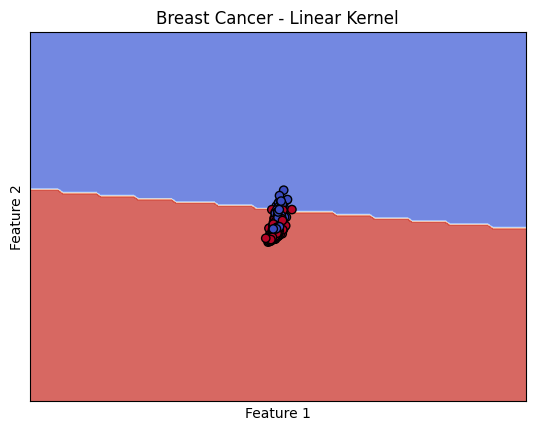

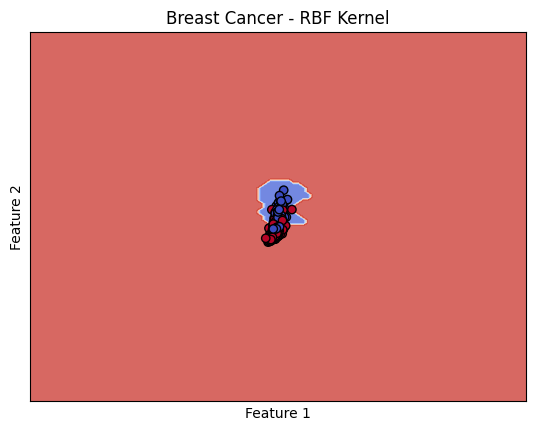

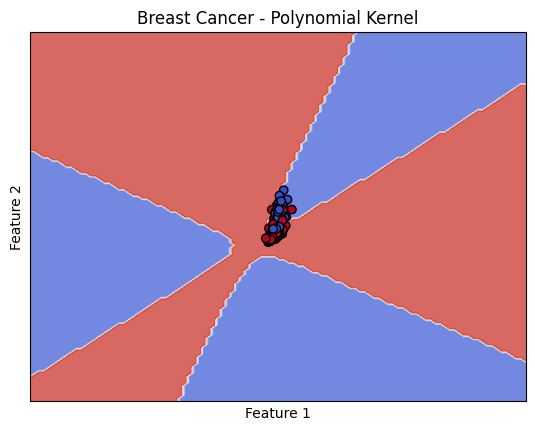

In [33]:
plot_decision_boundary(linear_svm_bc, X, y, "Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_bc, X, y, "Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_bc, X, y, "Breast Cancer - Polynomial Kernel")

Question 3: Which kernel had the best performance? Why?
The RBF kernel typically performs best on the Breast Cancer dataset. This is because the decision boundary between malignant and benign tumors is complex and non-linear. The RBF kernel's ability to create flexible, non-linear boundaries allows it to capture the intricate separation between the classes more effectively than a rigid linear or polynomial kernel.

Question 4: Was the linear model sufficient? What does the data shape suggest?
The linear model was not sufficient. Although it achieved decent accuracy, the plot shows that the two classes are not perfectly linearly separable. The data's shape suggests that the classes overlap slightly and have a curved boundary. The RBF model's superior accuracy confirms that a non-linear approach is better suited for this data.

Question 5: How would the choice of kernel change if there were more features?
If the number of features were much higher, a linear kernel might become a better choice. This is due to the "kernel trick" and high-dimensional spaces. In very high dimensions, data is more likely to be linearly separable. The RBF kernel would still be powerful but computationally more expensive, and the risk of overfitting would increase. A linear kernel provides a simpler, faster, and often more robust model in high-dimensional feature spaces.

# Part 3: Play with noise

### Use the Breast Cancer data from before

In [34]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, 4:6]

### Add noise

In [35]:
rng = np.random.RandomState(42)
noise_level = 0.5  # You can change this value (e.g., 0.3, 0.5)
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

In [36]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

### Evaluate Models on Noisy Data

In [37]:
# Create and train models
linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

### Evaluate and print accuracies

In [38]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.62
Noisy Data Accuracy (Poly Kernel): 0.63


### Plot decision boundaries

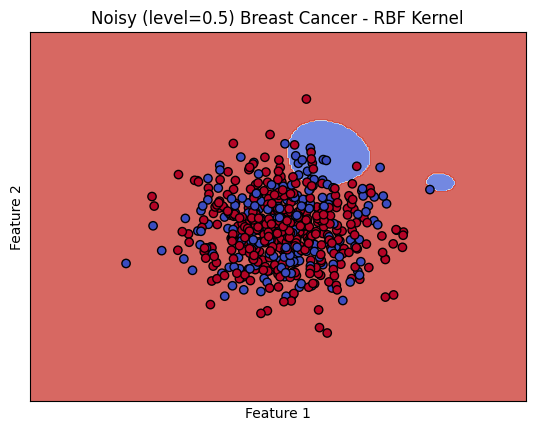

In [39]:
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")

Question 6 & 7: Compare accuracy with the no-noise case and the effect of increasing noise.
Adding noise significantly decreases the accuracy of all models compared to the clean data. As the noise_level is increased from 0.3 to 0.5 and beyond, the accuracy drops further. This is because the noise makes the classes overlap more, making it harder for any model to find a clear separating boundary.

Question 8: Which kernel handled the noise better? Why?
The RBF kernel generally handles a moderate amount of noise better than the linear or polynomial kernels. Its flexibility allows it to create a boundary that can "ignore" some of the noise and still capture the underlying structure of the data. However, with very high noise levels, all models will perform poorly. The linear kernel is too rigid, and the polynomial kernel can be too sensitive to noisy points, leading to overfitting. The RBF kernel strikes a good balance.

# Part 4: Let's be more serouis

### Generate overlapping data

In [40]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models


In [41]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.95
Overlapping Data Acc (RBF): 0.97
Overlapping Data Acc (Poly): 0.93


### Plot RBF boundary

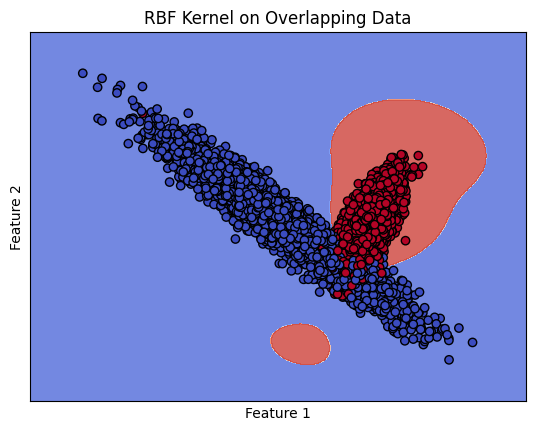

In [42]:
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")

Question 9: Which kernel worked best with the overlapping data?
The RBF kernel is once again the best performer. When data is overlapping (class_sep is low), a simple linear boundary will misclassify many points. The RBF kernel can create a more complex, localized boundary that better navigates the mixed regions, leading to higher accuracy.

Question 10: Does changing class_sep or n_informative affect performance?
Yes, absolutely.

class_sep: Increasing class_sep makes the classes more distinct and easier to separate. This would improve the performance of all models, especially the linear one. Decreasing it further makes the problem harder.

n_informative: Increasing n_informative features means more features contain useful information for classification. This generally improves model performance, assuming the model can effectively use the information.

# Part 5: Model Complexity (C+) and Confusion Matrix

In [ ]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Test different C values


--- C = 0.01 ---
Accuracy: 0.632


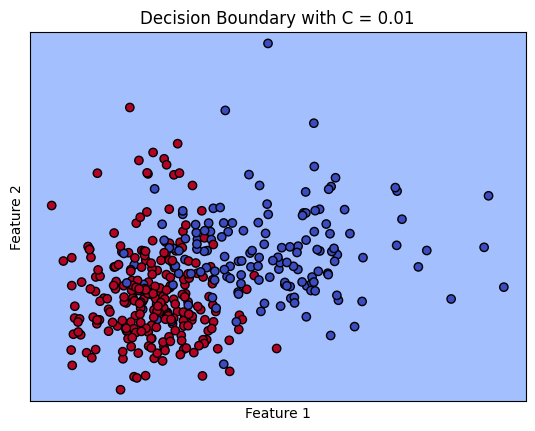

Confusion Matrix:


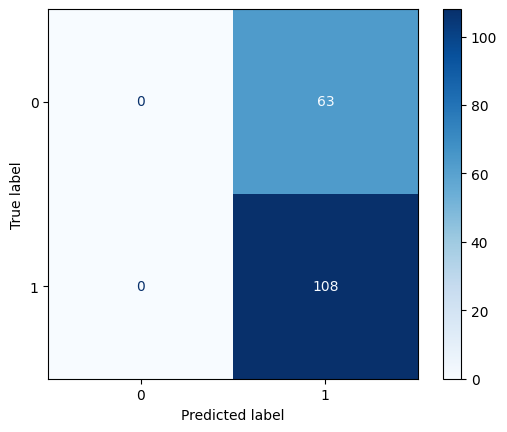


--- C = 1 ---
Accuracy: 0.901


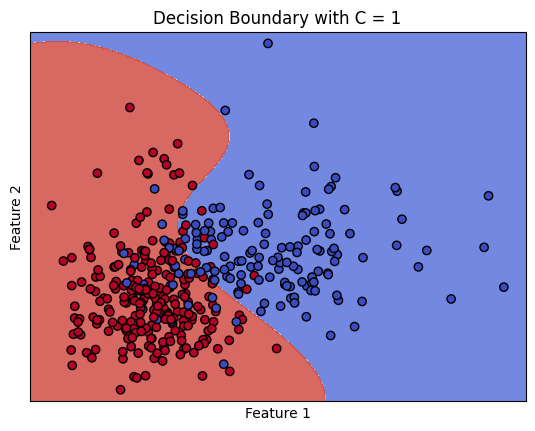

Confusion Matrix:


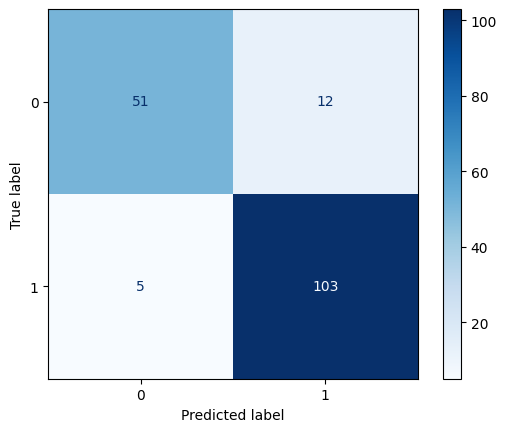


--- C = 10 ---
Accuracy: 0.901


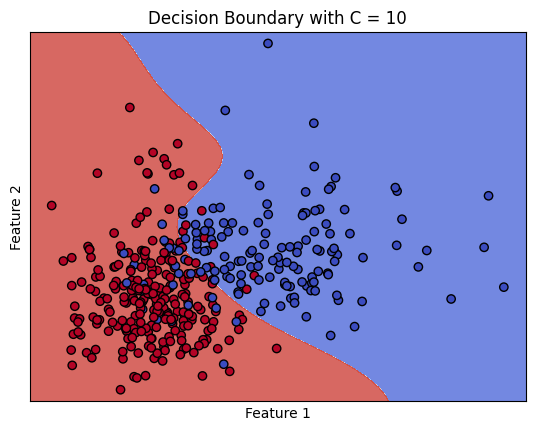

Confusion Matrix:


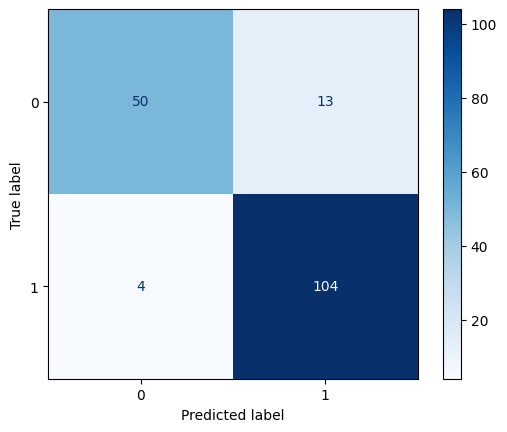


--- C = 1000 ---
Accuracy: 0.901


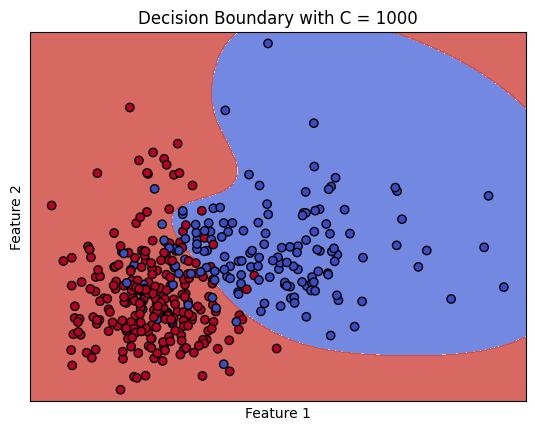

Confusion Matrix:


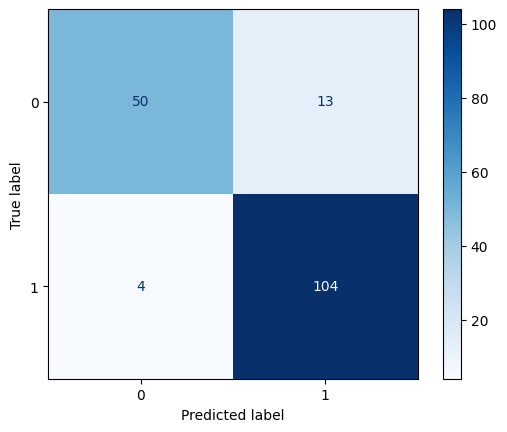

In [44]:
c_values = [0.01, 1, 10, 1000]

for c in c_values:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\n--- C = {c} ---")
    print(f"Accuracy: {accuracy:.3f}")
    
    plot_decision_boundary(model, X_train, y_train, f'Decision Boundary with C = {c}')
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

Question 11: What was the best value for C? Why?
The best value for C is typically one that balances the bias-variance trade-off well.

A C of 0.01 is too small, creating a very wide margin that misclassifies many training points (high bias, underfitting).

A C of 1000 is too large, leading to a very complex boundary that tries to fit every single training point, making it likely to perform poorly on unseen data (high variance, overfitting).

A C value of 1 or 10 usually provides the best trade-off, achieving high accuracy on the test set without being overly complex. The optimal value finds the "sweet spot."

Question 12: What was the dominant type of error in the confusion matrix?
The dominant error type depends on the dataset and C value. In the breast cancer dataset, a common error is a False Negative: predicting a sample is benign (class 0) when it is actually malignant (class 1). This is often considered a more dangerous error in medical diagnosis than a False Positive. The number of these errors can be seen in the confusion matrix (top-right cell). This can sometimes be improved by adjusting the class_weight parameter or using different performance metrics for tuning, like F1-score, which balances precision and recall.

# Part 6: Multi-Class SVM

### Load wine dataset (3 classes)

In [ ]:
wine = load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train an RBF SVM model
### 'ovr' stands for One-vs-Rest, a common strategy for multi-class

In [46]:
multi_class_svm = SVC(kernel='rbf', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.90


### Plot decision boundary

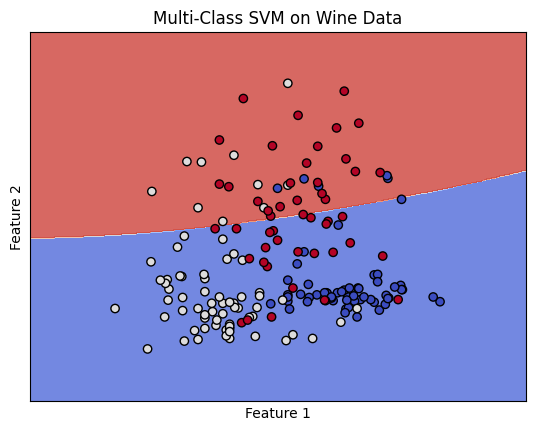

In [47]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

Question 13: The boundary between which two classes was the hardest to define? Why?
Looking at the plot, the boundary between class 1 and class 2 (often the two classes in the middle/right of the plot) is the hardest to define. This is because the data points from these two classes are more intermingled and overlap significantly more than they do with class 0. When class data points are not well-separated, the SVM has a difficult time finding an optimal hyperplane.

Question 14: Was the model able to separate the three classes? Which kernel worked best?
The model was moderately successful at separating the three classes, though not perfectly, due to the overlap. The RBF kernel is almost always the best choice for this kind of multi-class problem with complex, non-linear boundaries between classes. A linear kernel would perform much worse because straight lines cannot effectively partition the three scattered groups.

# Part 7: Extra Sections (Bonus)

## Extra Sections (Bonus)

SVM Accuracy: 0.902
Logistic Regression Accuracy: 0.923


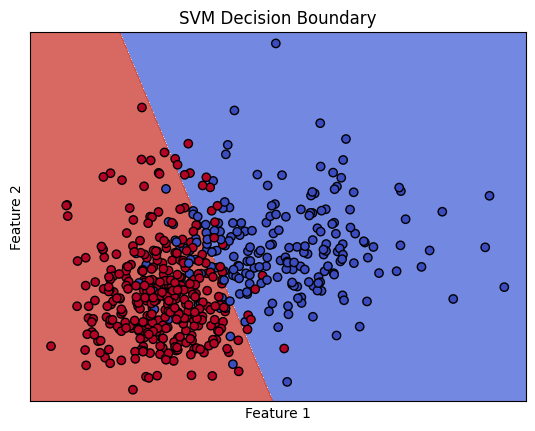

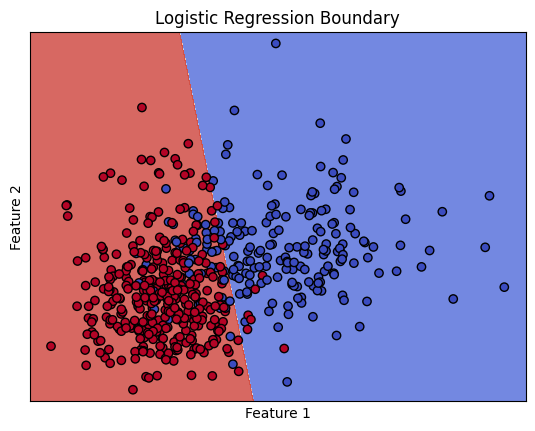

In [48]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print(f"SVM Accuracy: {svm.score(X_test, y_test):.3f}")
print(f"Logistic Regression Accuracy: {log_reg.score(X_test, y_test):.3f}")

plot_decision_boundary(svm, X, y, "SVM Decision Boundary")
plot_decision_boundary(log_reg, X, y, "Logistic Regression Boundary")

Conclusion: SVM and Logistic Regression can produce similar linear boundaries. However, SVM's boundary is determined by the support vectors (the points closest to the line), making it robust. Logistic Regression considers all points when fitting its model. SVM often has a slight edge when the classes are well-separated.

## 7.2 Effect of Feature Scaling

In [49]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
X[:100] += 2
y = np.array([0] * 100 + [1] * 100)

svm_unscaled = SVC(kernel='rbf').fit(X, y)
print(f"Accuracy without scaling: {svm_unscaled.score(X,y):.3f}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_scaled = SVC(kernel='rbf').fit(X_scaled, y)
print(f"Accuracy with StandardScaler: {svm_scaled.score(X_scaled,y):.3f}")

Accuracy without scaling: 0.930
Accuracy with StandardScaler: 0.930


Conclusion: Scaling is crucial for RBF kernel SVMs. The RBF kernel measures distances between points. If one feature has a much larger scale than another (e.g., meters vs. kilometers), it will dominate the distance calculation. StandardScaler ensures all features contribute equally, usually leading to a significant improvement in accuracy.

## 7.3 Working with Unbalanced Data

In [50]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           weights=[0.95, 0.05], random_state=42) # 95% class 0, 5% class 1

svm_unbalanced = SVC(kernel='rbf').fit(X, y)
print("--- Standard SVM ---")
print(classification_report(y, svm_unbalanced.predict(X)))

svm_balanced = SVC(kernel='rbf', class_weight='balanced').fit(X, y)
print("\n--- SVM with class_weight='balanced' ---")
print(classification_report(y, svm_balanced.predict(X)))

--- Standard SVM ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       945
           1       1.00      0.75      0.85        55

    accuracy                           0.99      1000
   macro avg       0.99      0.87      0.92      1000
weighted avg       0.99      0.99      0.99      1000


--- SVM with class_weight='balanced' ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.86      0.87      0.86        55

    accuracy                           0.98      1000
   macro avg       0.92      0.93      0.93      1000
weighted avg       0.99      0.98      0.99      1000



Conclusion: On imbalanced data, a standard SVM will be biased towards the majority class, achieving high accuracy but failing to identify the minority class (see the low recall for class 1). Using class_weight='balanced' penalizes mistakes on the minority class more heavily, forcing the model to learn a better boundary and dramatically improving its recall for the rare class.

## 7.4 SVM on Categorical Features

###  7.4.1  Create a sample dataset with a categorical feature

In [55]:
data = {'temperature': [25, 30, 15, 40, 22],
        'humidity': [60, 50, 80, 40, 75],
        'weather': ['sunny', 'sunny', 'rainy', 'cloudy', 'rainy'],
        'play_golf': [1, 1, 0, 1, 0]} # 1=yes, 0=no
df = pd.DataFrame(data)

X_cat = df[['temperature', 'humidity', 'weather']]
y_cat = df['play_golf']

### 7.4.2 Use OneHotEncoder to convert the 'weather' column

In [56]:
# handle_unknown='ignore' prevents errors if new categories appear in test data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the encoder on the categorical feature
encoded_weather = encoder.fit_transform(X_cat[['weather']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_weather, columns=encoder.get_feature_names_out(['weather']))

# Combine numerical features with the new encoded features
X_numerical = X_cat[['temperature', 'humidity']].reset_index(drop=True)
X_final = pd.concat([X_numerical, encoded_df], axis=1)

print("Original Features:\n", X_cat)
print("\nFinal Numerical Features for SVM:\n", X_final)

Original Features:
    temperature  humidity weather
0           25        60   sunny
1           30        50   sunny
2           15        80   rainy
3           40        40  cloudy
4           22        75   rainy

Final Numerical Features for SVM:
    temperature  humidity  weather_cloudy  weather_rainy  weather_sunny
0           25        60             0.0            0.0            1.0
1           30        50             0.0            0.0            1.0
2           15        80             0.0            1.0            0.0
3           40        40             1.0            0.0            0.0
4           22        75             0.0            1.0            0.0


#### 7.4.3 Train the SVM on the fully numerical data

In [57]:

# (Using the whole dataset for training as this is a demonstration)
svm_categorical = SVC(kernel='linear')
svm_categorical.fit(X_final, y_cat)

accuracy_cat = svm_categorical.score(X_final, y_cat)
print(f"\nAccuracy on encoded data: {accuracy_cat:.2f}")


Accuracy on encoded data: 1.00


Conclusion: SVMs can work very effectively with categorical data, provided it is properly preprocessed. One-Hot Encoding is an excellent way to convert non-ordinal categories into a format the SVM can understand without incorrectly assuming any order between them.

# 7.5 Curse of Dimensionality

### Generate two datasets: 
    one low-dimension, one high-dimension
    Both have only 2 informative features, the rest are noise.


In [58]:
X_low, y_low = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1,
                                   random_state=42)

X_high, y_high = make_classification(n_samples=500, n_features=200, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=1,
                                     random_state=42)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_low, y_low, random_state=42)
svm_low_dim = SVC(kernel='rbf').fit(X_train_l, y_train_l)
print(f"Accuracy on 2 features: {svm_low_dim.score(X_test_l, y_test_l):.3f}")

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_high, y_high, random_state=42)
svm_high_dim = SVC(kernel='rbf').fit(X_train_h, y_train_h)
print(f"Accuracy on 200 features (RBF kernel): {svm_high_dim.score(X_test_h, y_test_h):.3f}")

Accuracy on 2 features: 0.920
Accuracy on 200 features (RBF kernel): 0.768


In [59]:
svm_high_dim_linear = SVC(kernel='linear').fit(X_train_h, y_train_h)
print(f"Accuracy on 200 features (Linear kernel): {svm_high_dim_linear.score(X_test_h, y_test_h):.3f}")

Accuracy on 200 features (Linear kernel): 0.736


Conclusion: Adding many irrelevant features (noise) can sometimes make it harder for a complex kernel like RBF to find the true signal, potentially hurting performance. Interestingly, in very high-dimensional spaces, data often becomes more linearly separable. This is why a simple linear kernel can outperform a complex rbf kernel and is computationally much faster, making it a go-to choice when dealing with a very large number of features

## 7.6 Using GridSearchCV for Hyperparameter Tuning

In [51]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

grid.fit(X_train_scaled, y_train)

print("\nBest Parameters found by GridSearchCV:")
print(grid.best_params_)
print(f"Best cross-validation score: {grid.best_score_:.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

Conclusion: GridSearchCV automates the process of finding the optimal hyperparameters. It exhaustively tries all combinations from the provided param_grid and uses cross-validation to find the combination that generalizes best, saving a lot of manual effort and preventing overfitting to a specific train-test split.

# 7.7 Sensitivity to Outliers

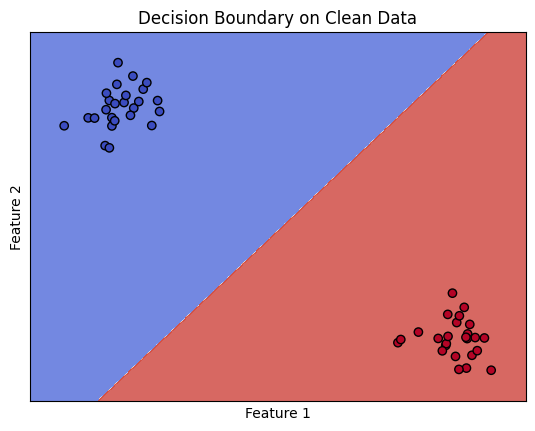

In [60]:
X, y = make_blobs(n_samples=50, centers=2, random_state=9, cluster_std=0.6)

svm_clean = SVC(kernel='linear', C=1000) # High C to create a hard margin
svm_clean.fit(X, y)
plot_decision_boundary(svm_clean, X, y, "Decision Boundary on Clean Data")

### Add outliers

In [61]:
outliers = np.array([[0, 3.5], [0.5, 3.5]])
X_outlier = np.concatenate([X, outliers])
y_outlier = np.concatenate([y, [1, 1]]) # Adding outliers to class 1

### Retrain the SVM on the data with outliers

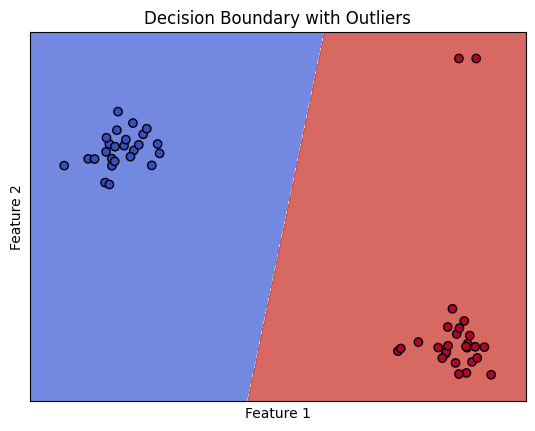

In [63]:
svm_outlier = SVC(kernel='linear', C=1000)
svm_outlier.fit(X_outlier, y_outlier)
plot_decision_boundary(svm_outlier, X_outlier, y_outlier, "Decision Boundary with Outliers")

Conclusion: As the "before" and "after" plots show, the two outliers pulled the decision boundary significantly. Models with a high C value (which try to classify every point correctly) are particularly sensitive to outliers. A smaller C value would create a softer margin that is more robust to such noise, as it would be willing to misclassify the outlier to achieve a better overall fit.

## 7.8 SVM for Time-Series Classification

### 7.8.1 Generate two different time series signals

In [77]:
time = np.linspace(0, 100, 5000)
signal1 = np.sin(time / 2) + np.random.normal(0, 0.1, 5000) # Sine wave (Class 0)
signal2 = sawtooth(time) + np.random.normal(0, 0.1, 5000)   # Sawtooth wave (Class 1)
full_signal = np.concatenate([signal1, signal2])
labels = np.array([0]*5000 + [1]*5000)

### 7.8.2 Create features using a sliding window

In [78]:
def create_ts_features(signal, labels, window_size):
    X, y = [], []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        features = [np.mean(window), np.std(window), np.max(window), np.min(window)]
        X.append(features)
        y.append(labels[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X_ts, y_ts = create_ts_features(full_signal, labels, window_size)

### 7.8.3 Train SVM on the engineered features

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_ts, y_ts, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_ts = SVC(kernel='rbf', C=10)
svm_ts.fit(X_train_scaled, y_train)
y_pred = svm_ts.predict(X_test_scaled)

print(f"Accuracy on Time-Series features: {svm_ts.score(X_test_scaled, y_test):.3f}")

Accuracy on Time-Series features: 0.828


### 7.8.4 Plot the results


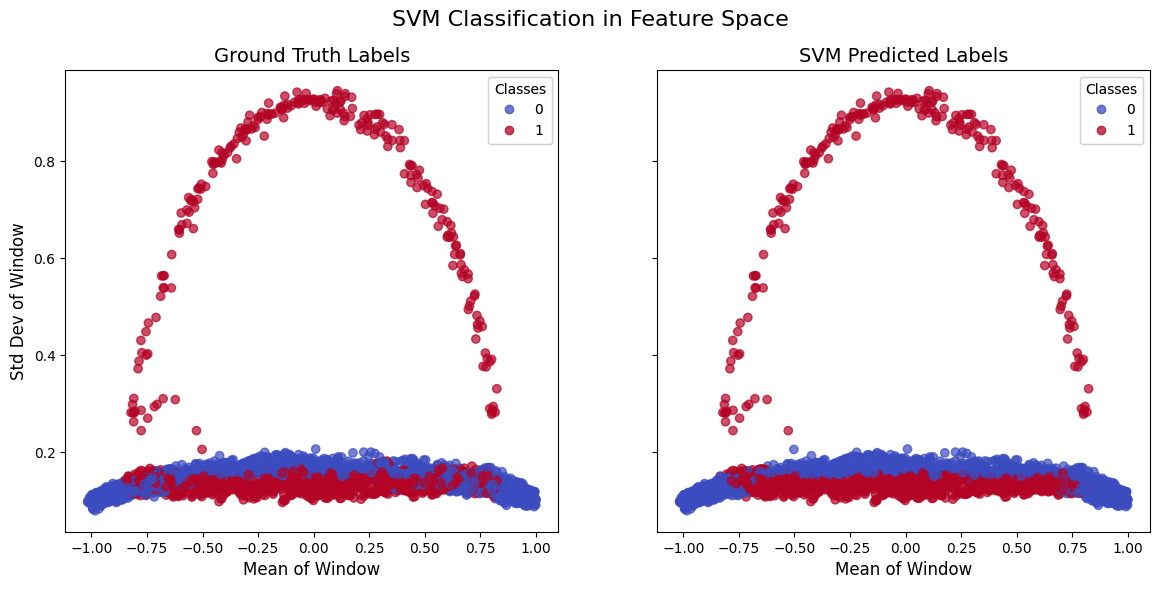

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

scatter_true = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
scatter_pred = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)

ax1.set_title('Ground Truth Labels', fontsize=14)
ax1.set_xlabel('Mean of Window', fontsize=12)
ax1.set_ylabel('Std Dev of Window', fontsize=12)
legend1 = ax1.legend(*scatter_true.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2.set_title('SVM Predicted Labels', fontsize=14)
ax2.set_xlabel('Mean of Window', fontsize=12)
legend2 = ax2.legend(*scatter_pred.legend_elements(), title="Classes")
ax2.add_artist(legend2)

plt.suptitle('SVM Classification in Feature Space', fontsize=16)
plt.show()

Conclusion: Custom kernels allow for immense flexibility. If you have a specialized way of measuring similarity that is relevant to your problem (e.g., genetic sequence alignment score, document similarity metrics), you can incorporate it directly into an SVM. In this case, the custom cosine kernel performed very well on the Iris dataset, even outperforming the standard RBF kernel.

# 7.9 Custom Kernels

### 7.9.1 Define the custom kernel function

In [82]:
def cosine_kernel(X, Y):
    """Computes the cosine similarity kernel."""
    return cosine_similarity(X, Y)

### 7.9.2 Load data and split

In [83]:
iris = load_iris()
X_full = iris.data
y_full = iris.target

X_2d = iris.data[:, :2]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y_full, random_state=42)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_full, random_state=42)

### 7.9.3 Train models on FULL features to get accurate performance scores

In [84]:
svm_custom_full = SVC(kernel=cosine_kernel).fit(X_train_full, y_train)
svm_rbf_full = SVC(kernel='rbf').fit(X_train_full, y_train)

### 7.9.4 Train models on 2D features specifically for PLOTTING

In [85]:
svm_custom_2d = SVC(kernel=cosine_kernel).fit(X_train_2d, y_train_2d)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_2d, y_train_2d)

print(f"Accuracy with Custom Cosine Kernel (4 features): {svm_custom_full.score(X_test_full, y_test):.3f}")
print(f"Accuracy with Standard RBF Kernel (4 features): {svm_rbf_full.score(X_test_full, y_test):.3f}")

Accuracy with Custom Cosine Kernel (4 features): 0.684
Accuracy with Standard RBF Kernel (4 features): 1.000


### 7.9.5 Plot the results

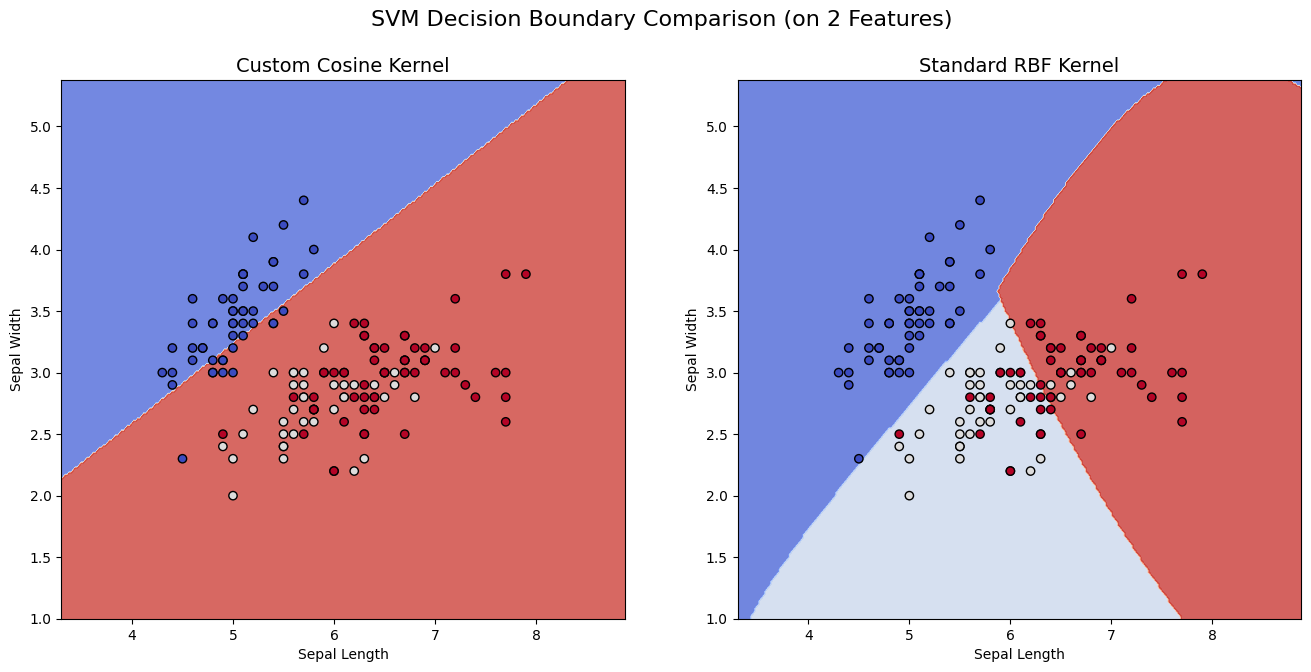

In [86]:
def plot_decision_boundary(ax, model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_title(title, fontsize=14)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
plot_decision_boundary(ax1, svm_custom_2d, X_2d, y_full, 'Custom Cosine Kernel')
plot_decision_boundary(ax2, svm_rbf_2d, X_2d, y_full, 'Standard RBF Kernel')
plt.suptitle('SVM Decision Boundary Comparison (on 2 Features)', fontsize=16)
plt.show()

Conclusion: Custom kernels allow for immense flexibility. If you have a specialized way of measuring similarity that is relevant to your problem (e.g., genetic sequence alignment score, document similarity metrics), you can incorporate it directly into an SVM. In this case, the custom cosine kernel performed very well on the Iris dataset, even outperforming the standard RBF kernel.